filenames: ['/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151001001_03107_00005_nrca1_cal.fits', '/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151001001_03107_00007_nrca1_cal.fits', '/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151001001_03107_00004_nrca1_cal.fits', '/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151001001_03107_00003_nrca1_cal.fits', '/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151001001_03107_00008_nrca1_cal.fits', '/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151001001_03107_00001_nrca1_cal.fits', '/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151001001_03107_00006_nrca1_cal.fits', '/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151001001_03107_00002_nrca1_cal.fits']


filenames: ['/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151001001_03107_00002_nrca2_cal.fits', '/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151001001_03107_00003_nrca2_cal.fits', '/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151001001_03107_00005_nrca2_cal.fits', '/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151001001_03107_00007_nrca2_cal.fits', '/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151001001_03107_00001_nrca2_cal.fits', '/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151001001_03107_00006_nrca2_cal.fits', '/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151001001_03107_00004_nrca2_cal.fits', '/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151001001_03107_00008_nrca2_cal.fits']
filenames: ['/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151001001_03107_00003_nrca3_cal.fits', '/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151001001_03107_00002_nrca3_cal.fits', '/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151001001_03107_00001_nrca3_cal.fits

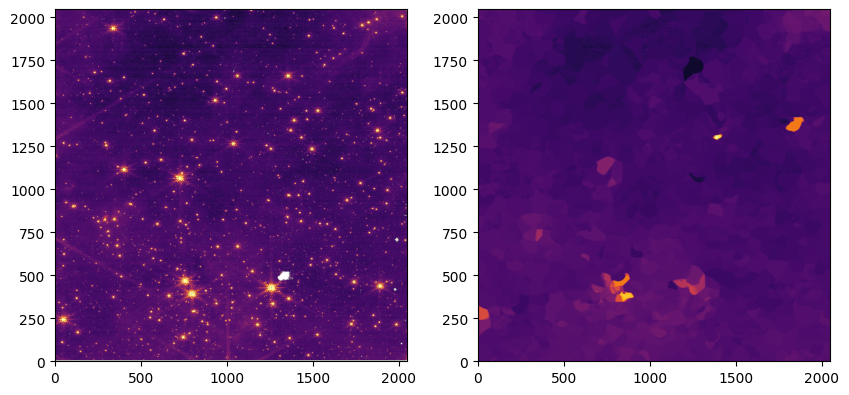

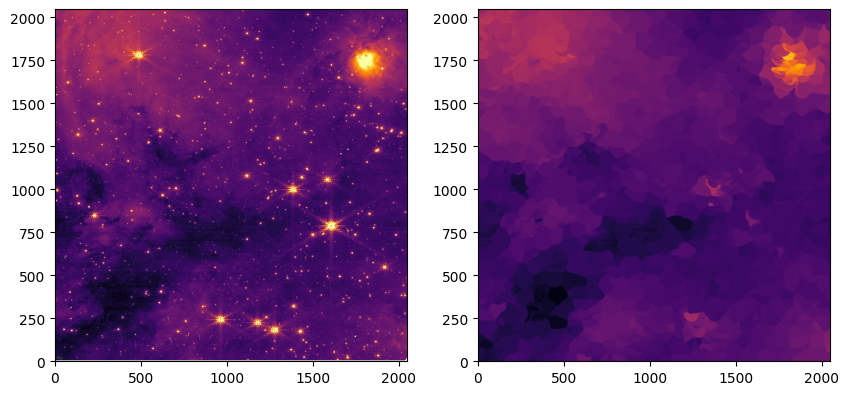

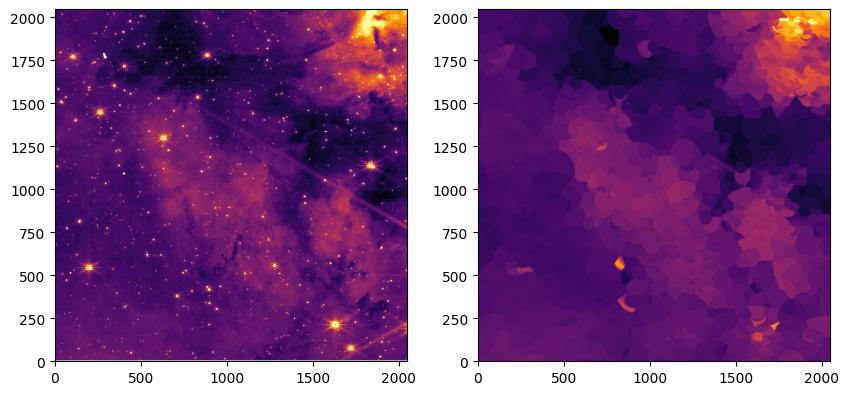

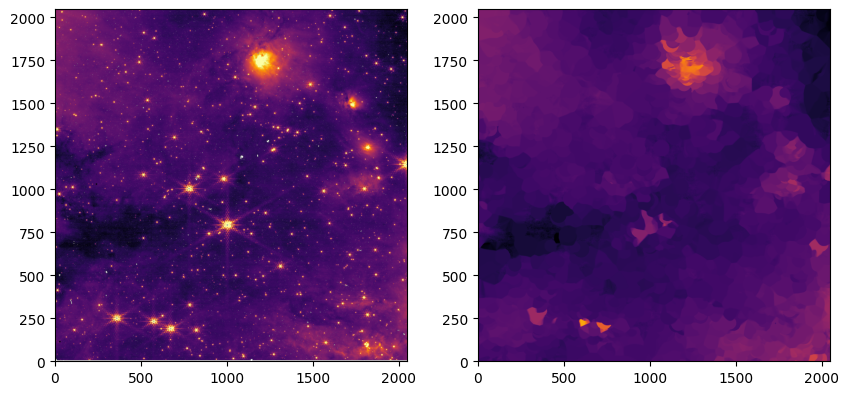

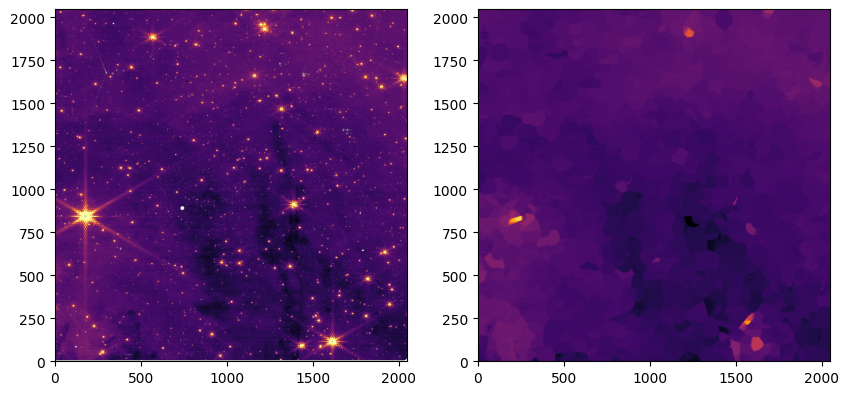

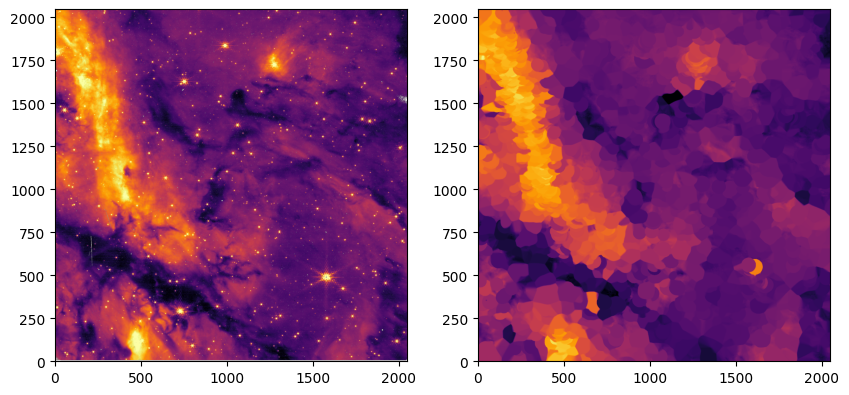

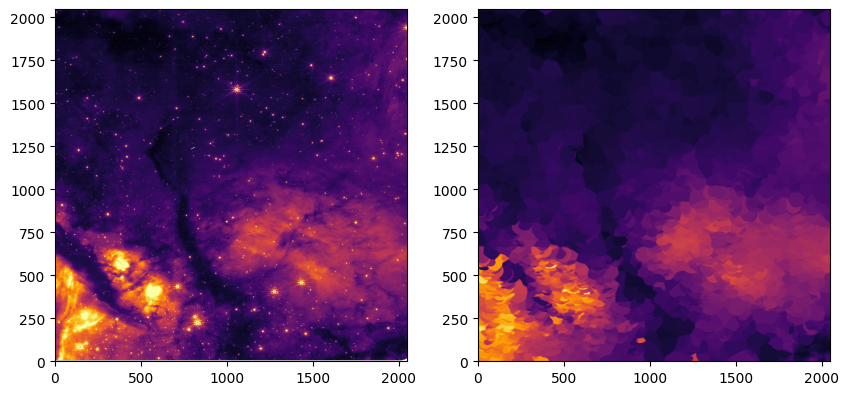

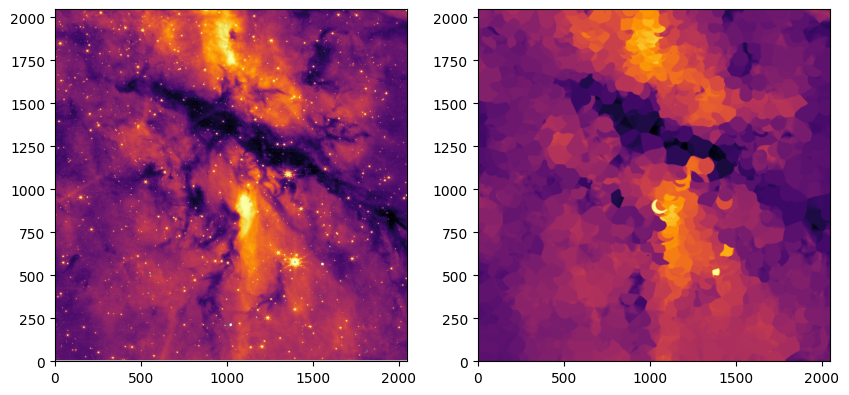

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import glob
from astropy.io import fits
from astropy.visualization import simple_norm


def get_filenames(basepath, filtername, proposal_id, field, each_suffix, module, pupil='clear', visitid='001'):

    # jw01182004002_02101_00012_nrcalong_destreak_o004_crf.fits
    # jw02221001001_07101_00012_nrcalong_destreak_o001_crf.fits
    # jw02221001001_05101_00022_nrcb3_destreak_o001_crf.fits
    glstr = f'{basepath}/{filtername}/pipeline/jw0{proposal_id}*{module}*_{each_suffix}.fits'
    
  
    fglob = glob.glob(glstr)
    for st in fglob:
        
        if 'align' in st or 'uncal' in st:
            print(f"Removing {st} from glob string because it is an alignment file")
            fglob.remove(st)
    if len(fglob) == 0:
        raise ValueError(f"No matches found to {glstr}")
    else:
        return fglob


nvisits = {'2221': {'brick': 1, 'cloudc': 2},
               '1182': {'brick': 2},
               '6151': {'w51': 1 , 'w51_miri': 2 }
               }
modules = ['nrca1', 'nrca2', 'nrca3', 'nrca4', 'nrcb1', 'nrcb2', 'nrcb3', 'nrcb4']
#modules = ['nrcalong', 'nrcblong']
#modules=['mirimage']
filternames = ['F210M']
proposal_id = '6151'
target = 'w51'

field_to_reg_mapping = {'2221': {'001': 'brick', '002': 'cloudc'},
                            '1182': {'004': 'brick'},
                            '6151': {'001': 'w51', '002': 'w51_miri'}}[proposal_id]
reg_to_field_mapping = {v:k for k,v in field_to_reg_mapping.items()}
field = reg_to_field_mapping[target]

basepath = f'/orange/adamginsburg/jwst/w51'
if True:
    for module in modules:
        #detector = module # no sub-detectors for long-NIRCAM
        for filtername in filternames:
            if True:
                for visitid in range(1, nvisits[proposal_id][target] + 1):
                    visitid = f'{visitid:03d}'
                    
                    filenames = get_filenames(basepath, filtername, proposal_id,
                                              field, visitid=visitid,
                                              each_suffix='cal',
                                              module=module, pupil='clear')
                    print('filenames:', filenames)
                    for i, filename in enumerate(filenames):
                        if i==0:
                            bgd_file = f"{filename.replace('.fits','_starbug2-bgd.fits')}"
                            original_image = fits.getdata(filename)
                            bgd_image = fits.getdata(bgd_file)
                            fig = plt.figure(figsize=(10,5))
                            ax1 = fig.add_subplot(1,2,1)
                            norm = simple_norm(original_image, 'sqrt', percent=99)
                            im1 = ax1.imshow(original_image, origin='lower', norm=norm, cmap='inferno')
                            ax2 = fig.add_subplot(1,2,2)
                            im2 = ax2.imshow(bgd_image, origin='lower', norm=norm, cmap='inferno')


